First 5 entries:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Label distribution:
label
ham     4825
spam     747
Name: count, dtype: int64


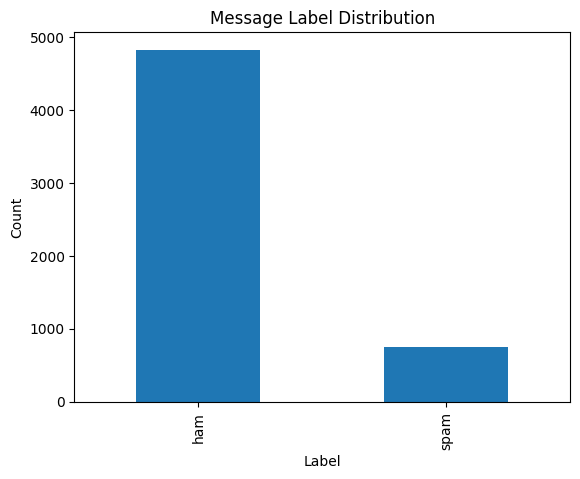


Message length statistics:
count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64


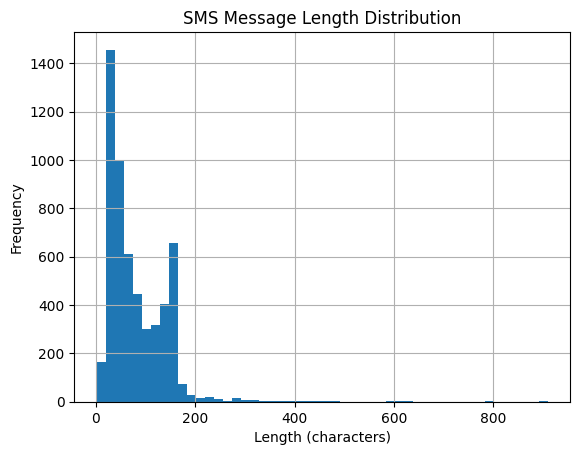

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the SMS Spam Collection dataset
# Make sure you have downloaded the file and saved it as 'SMSSpamCollection.csv' in the working directory
# The file is tab-separated and has no header
df = pd.read_csv('../data/raw/SMSSpamCollection.csv', sep='\t', names=['label', 'message'])

# Display first rows
print("First 5 entries:")
print(df.head())

# Label distribution
label_counts = df['label'].value_counts()
print("\nLabel distribution:")
print(label_counts)

# Plot label distribution
plt.figure()
label_counts.plot(kind='bar')
plt.title('Message Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Message length analysis
df['length'] = df['message'].apply(len)
print("\nMessage length statistics:")
print(df['length'].describe())

# Plot message length distribution
plt.figure()
df['length'].hist(bins=50)
plt.title('SMS Message Length Distribution')
plt.xlabel('Length (characters)')
plt.ylabel('Frequency')
plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model      import LogisticRegression
from sklearn.pipeline          import Pipeline
from sklearn.metrics           import classification_report, confusion_matrix

# 1. Split (stratify to keep class ratio)
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label'], 
    test_size=0.2, 
    stratify=df['label'], 
    random_state=42
)

# 2. Build pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        lowercase=True,
        stop_words='english',
        max_df=0.9,      # ignore very frequent tokens
        min_df=5         # ignore very rare tokens
    )),
    ('clf', LogisticRegression(
        class_weight='balanced',  # compensate for imbalance
        max_iter=1000, 
        random_state=42
    )),
])

# 3. Train
pipeline.fit(X_train, y_train)

# 4. Evaluate
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       966
        spam       0.92      0.92      0.92       149

    accuracy                           0.98      1115
   macro avg       0.95      0.95      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Confusion matrix:
 [[954  12]
 [ 12 137]]
